In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models


In [46]:
# ================================================
# Load Dataset
# ================================================
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['target'] = (data.target == 2).astype(int)

print("The data set is the following")
print(df.head())

The data set is the following
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [47]:
# ================================================
# Basic EDA
# ================================================

print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [48]:
print("\nClass Distribution:")
print(df['target'].value_counts())


Class Distribution:
target
0    100
1     50
Name: count, dtype: int64


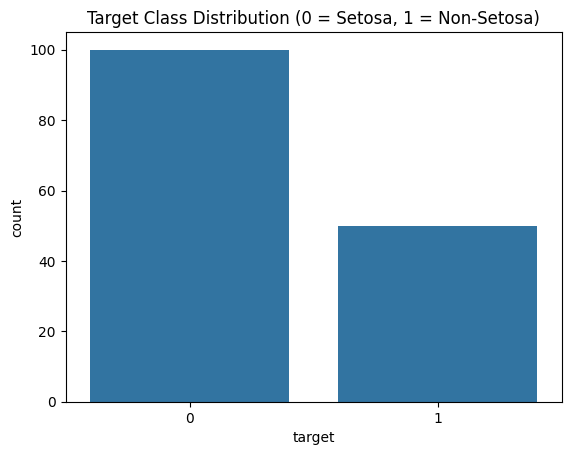

In [49]:
# Visualize class balance
sns.countplot(x='target', data=df)
plt.title("Target Class Distribution (0 = Setosa, 1 = Non-Setosa)")
plt.show()


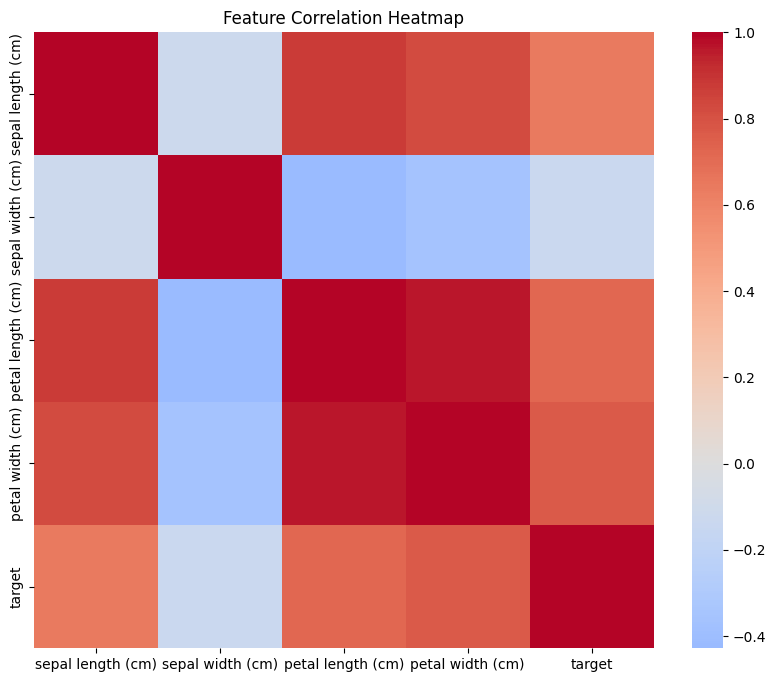

In [50]:
# Correlation heatmap (top features)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

In [51]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum().sum())


Missing Values:
0


In [52]:
# ================================================
# Preprocessing
# ================================================

In [53]:
X = df.drop('target', axis=1)
y = df['target']

In [54]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData Preprocessing Finished!")


Data Preprocessing Finished!


In [56]:
# ================================================
# Build TensorFlow Model (Iris Dataset)
# ================================================

model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # sigmoid → binary output (0 = Setosa, 1 = Non-Setosa)
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

In [57]:
# ================================================
# Train Model
# ================================================

In [58]:
history = model.fit(X_train_scaled, y_train, epochs=40, batch_size=8, validation_split=0.2, verbose=1)

Epoch 1/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6970 - loss: 0.7107 - val_accuracy: 0.5000 - val_loss: 0.7861
Epoch 2/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7202 - loss: 0.6492 - val_accuracy: 0.5000 - val_loss: 0.7433
Epoch 3/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7410 - loss: 0.5727 - val_accuracy: 0.5000 - val_loss: 0.7079
Epoch 4/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6382 - loss: 0.6326 - val_accuracy: 0.5000 - val_loss: 0.6720
Epoch 5/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7193 - loss: 0.5504 - val_accuracy: 0.5000 - val_loss: 0.6458
Epoch 6/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6873 - loss: 0.5301 - val_accuracy: 0.5000 - val_loss: 0.6224
Epoch 7/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6039 - loss: 0.5609 - val_accuracy: 0.5000 - val_loss: 0.5983
Epoch 8/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7099 - loss: 0.4645 - val_accuracy: 0.5000 - val_loss

In [59]:
# ================================================
# Evaluate Model
# ================================================

In [60]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.9667 - loss: 0.1684

Test Accuracy: 96.67%


In [61]:
# ================================================
# Plot Training Results
# ================================================

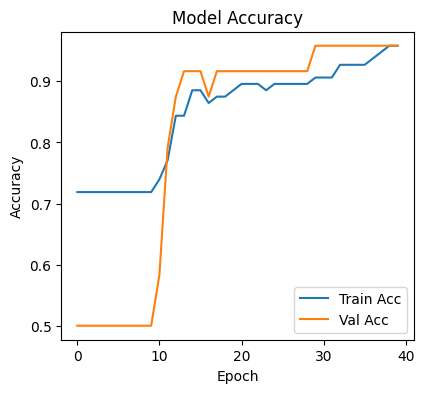

In [62]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

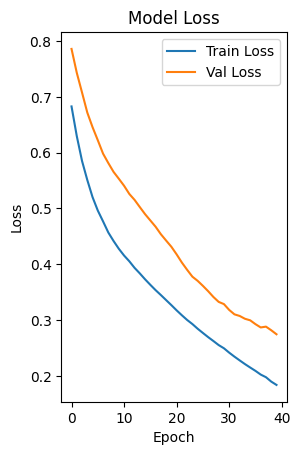

In [63]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [66]:
new_sample = X_test.iloc[0]                    # take one sample from test set
new_sample_scaled = scaler.transform([new_sample])  # scale it same as training data

# Predict
prediction_prob = model.predict(new_sample_scaled)[0][0]
prediction_class = int(prediction_prob > 0.5)

print("\nSingle Sample Prediction:")
print(f"Predicted Class: {prediction_class} (0 = Not Virginica, 1 = Virginica)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

Single Sample Prediction:
Predicted Class: 0 (0 = Not Virginica, 1 = Virginica)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
